In [28]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sb
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

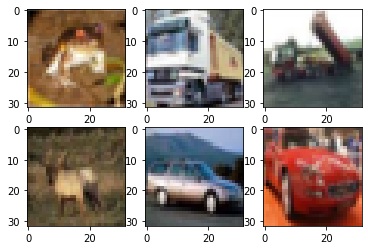

(50000, 32, 32, 3)
(50000,)
(10000, 32, 32, 3)
(10000,)


In [29]:
cifar= tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar.load_data()


train_labels = train_labels.reshape(-1,)
train_images = train_images/255 

test_labels = test_labels.reshape(-1,)
test_images = test_images/255

for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(train_images[i],cmap='gray')
plt.show()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)



 
 

---


  **CNN Model**







In [30]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))


model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(64,activation='relu'))

model.add(tf.keras.layers.Dense(10))

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2304)              0         
                                                                 
 dense_13 (Dense)            (None, 128)              

In [31]:
from keras import optimizers
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = tf.keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']
epochs=20
batchSize=64

model.compile(loss=loss,optimizer=optim,metrics=metrics)
model.fit(train_images,train_labels,batch_size=batchSize,epochs=epochs,shuffle=True)



Epoch 1/20
782/782 [==============================] - 12s 15ms/step - loss: 1.5274 - accuracy: 0.4440
Epoch 2/20
782/782 [==============================] - 12s 15ms/step - loss: 1.1395 - accuracy: 0.5975
Epoch 3/20
782/782 [==============================] - 12s 15ms/step - loss: 0.9885 - accuracy: 0.6514
Epoch 4/20
782/782 [==============================] - 12s 15ms/step - loss: 0.8896 - accuracy: 0.6885
Epoch 5/20
782/782 [==============================] - 12s 15ms/step - loss: 0.8150 - accuracy: 0.7146
Epoch 6/20
782/782 [==============================] - 12s 15ms/step - loss: 0.7511 - accuracy: 0.7381
Epoch 7/20
782/782 [==============================] - 12s 15ms/step - loss: 0.6852 - accuracy: 0.7593
Epoch 8/20
782/782 [==============================] - 12s 15ms/step - loss: 0.6312 - accuracy: 0.7787
Epoch 9/20
782/782 [==============================] - 12s 15ms/step - loss: 0.5829 - accuracy: 0.7932
Epoch 10/20
782/782 [==============================] - 12s 15ms/step - loss: 0.540

In [32]:
loss, accuracy = model.evaluate(test_images,test_labels,batch_size=batchSize)
print('Accuracy : ', accuracy)

157/157 [==============================] - 1s 6ms/step - loss: 1.6199 - accuracy: 0.6786
Accuracy :  0.678600013256073


#### Adding SoftMax Layer

Prediction :  frog


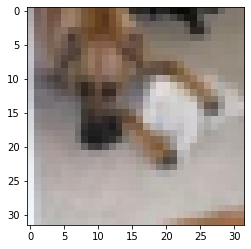

In [33]:

#prediction time
pred_model= tf.keras.models.Sequential();
pred_model.add(model)
pred_model.add(tf.keras.layers.Softmax())

cnt =random.randint(1000)

predictions=pred_model(test_images)
pred0=predictions[cnt]
label0=np.argmax(pred0) #agrmax finds max in the array passed .here aray is pred0

# print(pred0)
plt.imshow(test_images[cnt],cmap='gray')
print("Prediction : ",classes[test_labels[label0]])

313/313 [==============================] - 1s 3ms/step


<AxesSubplot:>

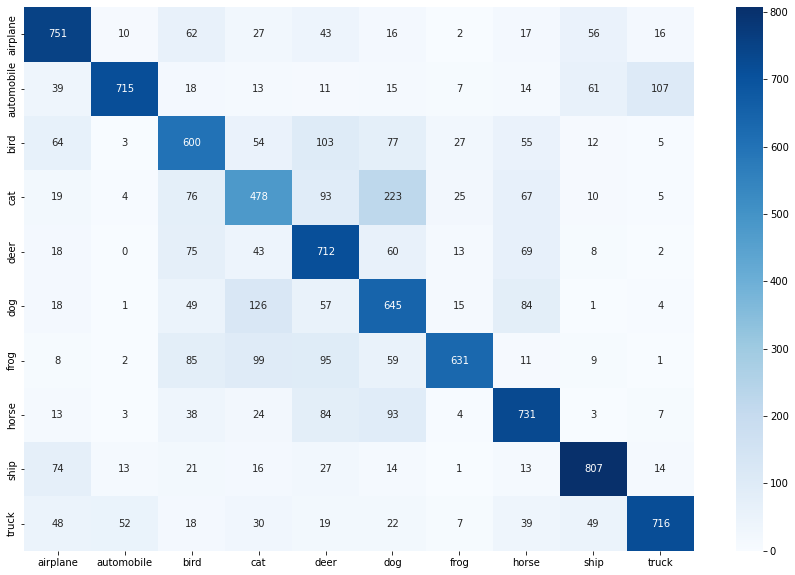

In [34]:
y_pred = np.argmax(pred_model.predict(test_images), axis=1)
labels = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

conf_matrix = pd.DataFrame(confusion_matrix(test_labels, y_pred), columns=labels, index=labels)
plt.figure(figsize=(15,10))  
sb.heatmap(conf_matrix, annot=True, fmt="d",cmap="Blues")